In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib import figure
import warnings
warnings.filterwarnings('ignore')

import statsmodels.api as sm
from scipy.stats import norm
from scipy.stats import t
import plotly.express as px

# About the project and Problem Statement : 

## About Yulu

- Yulu is India’s leading micro-mobility service provider, which offers unique vehicles for the daily commute. Starting off as a mission to eliminate traffic congestion in India, Yulu provides the safest commute solution through a user-friendly mobile app to enable shared, solo and sustainable commuting.

- Yulu zones are located at all the appropriate locations (including metro stations, bus stands, office spaces, residential areas, corporate offices, etc) to make those first and last miles smooth, affordable, and convenient!

- Yulu has recently suffered considerable dips in its revenues. They have contracted a consulting company to understand the factors on which the demand for these shared electric cycles depends. Specifically, they want to understand the factors affecting the demand for these shared electric cycles in the Indian market.


### `The company wants to know:`

- Which variables are significant in predicting the demand for shared electric cycles in the Indian market?
- How well those variables describe the electric cycle demands

#### Column Profiling:

- datetime: datetime
- season: season (1: spring, 2: summer, 3: fall, 4: winter)

- workingday: if day is neither weekend nor holiday is 1, otherwise is 0.


- weather:

    1. : Clear, Few clouds, partly cloudy, partly cloudy
    2. : Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    3. : Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    4. : Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
    

- temp: temperature in Celsius
- atemp: feeling temperature in Celsius
- humidity: humidity
- windspeed: wind speed
- casual: count of casual users
- registered: count of registered users
- count: count of total rental bikes including both casual and registered

In [3]:
df = pd.read_csv("bike_sharing.txt")

In [4]:
data = df.copy()

##### # shape of the data : 

In [5]:

data.shape

(10886, 12)

In [6]:
data.head(10)

datetime  season  holiday  workingday  weather   temp   atemp  \
0  2011-01-01 00:00:00       1        0           0        1   9.84  14.395   
1  2011-01-01 01:00:00       1        0           0        1   9.02  13.635   
2  2011-01-01 02:00:00       1        0           0        1   9.02  13.635   
3  2011-01-01 03:00:00       1        0           0        1   9.84  14.395   
4  2011-01-01 04:00:00       1        0           0        1   9.84  14.395   
5  2011-01-01 05:00:00       1        0           0        2   9.84  12.880   
6  2011-01-01 06:00:00       1        0           0        1   9.02  13.635   
7  2011-01-01 07:00:00       1        0           0        1   8.20  12.880   
8  2011-01-01 08:00:00       1        0           0        1   9.84  14.395   
9  2011-01-01 09:00:00       1        0           0        1  13.12  17.425   

   humidity  windspeed  casual  registered  count  
0        81     0.0000       3          13     16  
1        80     0.0000       8          32     40  
2        80     0.0000       5          27     32  
3        75     0.0000       3          10     13  
4        75     0.0000       0           1      1  
5        75     6.0032       0           1      1  
6        80     0.0000       2           0      2  
7        86     0.0000       1           2      3  
8        75     0.0000       1           7      8  
9        76     0.0000       8           6     14

##### 10886 Records of bike Rented (each record shows howmany bikes were rented during that hour of the day.)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [8]:
data.isna().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

**no null values detected**

In [9]:
data.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

#### unique values per columns: 

In [10]:
data.nunique()

datetime      10886
season            4
holiday           2
workingday        2
weather           4
temp             49
atemp            60
humidity         89
windspeed        28
casual          309
registered      731
count           822
dtype: int64

    



workingday: except weekend or holiday is 1,
offday : 0.



#### weather : 

 -                   weather changed                                                             to 
1. : Clear, Few clouds, partly cloudy, partly cloudy                                            (clear)
2. : Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist                               (cloudy)
3. : Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds    (little rain)
4. : Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog                                 (heavey rain) 

## `Pre-processing data : `

In [11]:
data["weather"].replace({1:"Clear",
                       2:"Cloudy",
                       3:"Little Rain",
                       4:"Heavy Rain"},inplace=True)
data["season"].replace({1:"Spring",
                       2:"Summer",
                       3:"Fall",
                       4:"Winter"},inplace=True)
data["workingday"].replace({1:"Yes",
                           0:"No"},inplace=True)
data["datetime"] = pd.to_datetime(data["datetime"])
data["holiday"].replace({1:"Yes",
                           0:"No"},inplace=True)
data["day"]=data["datetime"].dt.day_name()
data["date"] = data["datetime"].dt.date
data["hour"] = data["datetime"].dt.hour
data["Month"] = data["datetime"].dt.month
data["Month_name"] = data["datetime"].dt.month_name()
data["year"] = data["datetime"].dt.year

### Describing Statistical summery of Independent Numerical Features :
###### Categorising Temperature And Humidity Levels and Windspeed column data : 

In [12]:
pd.DataFrame(data["atemp"].describe()).T

count       mean       std   min     25%    50%    75%     max
atemp  10886.0  23.655084  8.474601  0.76  16.665  24.24  31.06  45.455

In [13]:
def get_temp(temp):
    if temp <= 12 : return "very low"
    elif temp > 12 and temp < 24 : return "low"
    elif temp >= 24  and temp < 35 :  return "moderate"
    elif temp >= 35 : return "high"

In [14]:
data["temperature"]=pd.Series(map(get_temp,data["atemp"]))

In [15]:
pd.DataFrame(data["humidity"].describe()).T

count      mean        std  min   25%   50%   75%    max
humidity  10886.0  61.88646  19.245033  0.0  47.0  62.0  77.0  100.0

In [16]:
def get_humidity(H):
    if 0 <= H <= 10:
        return "10%"
    elif 11 <= H <= 20:
        return "20%"
    elif 21 <= H <= 30:
        return "30%"
    elif 31 <= H <= 40:
        return "40%"
    elif 41 <= H <= 50:
        return "50%"
    elif 51 <= H <= 60:
        return "60%"
    elif 61 <= H <= 70:
        return "70%"
    elif 71 <= H <= 80:
        return "80%"
    elif 81 <= H <= 90:
        return "90%"
    elif 91 <= H <= 100:
        return "100%"
        

In [17]:
data["gethumidity"]  = pd.Series(map(get_humidity,data["humidity"]))

In [18]:
pd.DataFrame(data["windspeed"].describe()).T

count       mean       std  min     25%     50%      75%      max
windspeed  10886.0  12.799395  8.164537  0.0  7.0015  12.998  16.9979  56.9969

In [19]:
data["windspeed_category"] = pd.qcut(data["windspeed"],8)

In [20]:
data["windspeed_category"] = data["windspeed_category"].astype("object")

##### Data information : 

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   datetime            10886 non-null  datetime64[ns]
 1   season              10886 non-null  object        
 2   holiday             10886 non-null  object        
 3   workingday          10886 non-null  object        
 4   weather             10886 non-null  object        
 5   temp                10886 non-null  float64       
 6   atemp               10886 non-null  float64       
 7   humidity            10886 non-null  int64         
 8   windspeed           10886 non-null  float64       
 9   casual              10886 non-null  int64         
 10  registered          10886 non-null  int64         
 11  count               10886 non-null  int64         
 12  day                 10886 non-null  object        
 13  date                10886 non-null  object    

### statistical summery about categorical data :

In [22]:
data.describe(include=["object","category"])

season holiday workingday weather       day        date Month_name  \
count    10886   10886      10886   10886     10886       10886      10886   
unique       4       2          2       4         7         456         12   
top     Winter      No        Yes   Clear  Saturday  2011-01-01        May   
freq      2734   10575       7412    7192      1584          24        912   

       temperature gethumidity windspeed_category  
count        10886       10886              10886  
unique           4          10                  8  
top       moderate         70%    (-0.001, 6.003]  
freq          4767        1845               2185

**Moderate level Temperature frequency is highest in given data**

**70% humidty**

**and most preferable windspeed 8-12** 

In [23]:
correlations = data[['temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']].corr().unstack()

### Correlation Matrix : 

In [24]:
data[['temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']].corr()

temp     atemp  humidity  windspeed    casual  registered  \
temp        1.000000  0.984948 -0.064949  -0.017852  0.467097    0.318571   
atemp       0.984948  1.000000 -0.043536  -0.057473  0.462067    0.314635   
humidity   -0.064949 -0.043536  1.000000  -0.318607 -0.348187   -0.265458   
windspeed  -0.017852 -0.057473 -0.318607   1.000000  0.092276    0.091052   
casual      0.467097  0.462067 -0.348187   0.092276  1.000000    0.497250   
registered  0.318571  0.314635 -0.265458   0.091052  0.497250    1.000000   
count       0.394454  0.389784 -0.317371   0.101369  0.690414    0.970948   

               count  
temp        0.394454  
atemp       0.389784  
humidity   -0.317371  
windspeed   0.101369  
casual      0.690414  
registered  0.970948  
count       1.000000

### Heatmap (correlation between features)

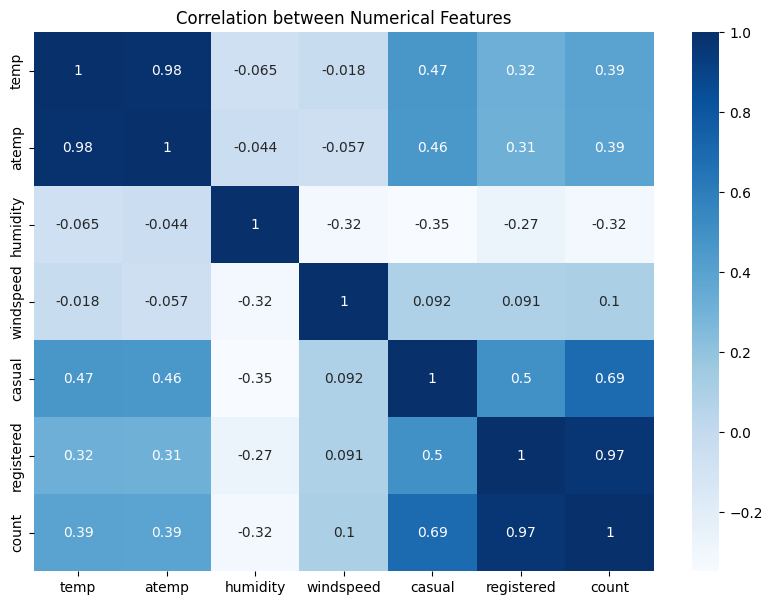

In [25]:
plt.figure(figsize=(10,7))
sns.heatmap(data[['temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']].corr(),annot=True,cmap = "Blues")
plt.title("Correlation between Numerical Features")
plt.show()

**Correlation between Temperature and Number of Cycles Rented for all customers : 0.39**

**Correlation between Temperature and Number of Cycles Rented for casual subscribers : 0.46**

**Correlation between Temperature and Number of Cycles Rented for registered subscribers : 0.31**

**Correlation between Temperature and Number of Cycles Rented for registered subscribers : 0.31**

**Humidity has a negative correlation with the number of cycles rented which is -0.32**





#### Pre-processed Data Sample  : 

In [26]:
pd.set_option('display.max_columns',None)
# to see all the columns

In [27]:
data.sample(10)

datetime  season holiday workingday      weather   temp  \
6532 2012-03-09 10:00:00  Spring      No        Yes       Cloudy  13.94   
6476 2012-03-07 02:00:00  Spring      No        Yes        Clear  12.30   
5128 2011-12-07 18:00:00  Winter      No        Yes  Little Rain  16.40   
594  2011-02-07 22:00:00  Spring      No        Yes        Clear  11.48   
7332 2012-05-04 21:00:00  Summer      No        Yes        Clear  26.24   
1546 2011-04-10 07:00:00  Summer      No         No       Cloudy  14.76   
1718 2011-04-17 12:00:00  Summer      No         No        Clear  18.86   
3956 2011-09-15 21:00:00    Fall      No        Yes        Clear  18.86   
9744 2012-10-10 09:00:00  Winter      No        Yes        Clear  22.14   
9403 2012-09-15 04:00:00    Fall      No         No       Cloudy  24.60   

       atemp  humidity  windspeed  casual  registered  count        day  \
6532  14.395        36    32.9975      14         145    159     Friday   
6476  14.395        56    19.0012       0           4      4  Wednesday   
5128  20.455        94    19.9995       3          48     51  Wednesday   
594   15.150        81     6.0032       3          34     37     Monday   
7332  30.305        69    12.9980      49         186    235     Friday   
1546  18.180       100     6.0032       3           7     10     Sunday   
1718  22.725        38    26.0027     167         187    354     Sunday   
3956  22.725        63    22.0028      11         134    145   Thursday   
9744  25.760        60    19.0012      35         331    366  Wednesday   
9403  29.545        69    23.9994       3           3      6   Saturday   

            date  hour  Month Month_name  year temperature gethumidity  \
6532  2012-03-09    10      3      March  2012         low         40%   
6476  2012-03-07     2      3      March  2012         low         60%   
5128  2011-12-07    18     12   December  2011         low        100%   
594   2011-02-07    22      2   February  2011         low         90%   
7332  2012-05-04    21      5        May  2012    moderate         70%   
1546  2011-04-10     7      4      April  2011         low        100%   
1718  2011-04-17    12      4      April  2011         low         40%   
3956  2011-09-15    21      9  September  2011         low         70%   
9744  2012-10-10     9     10    October  2012    moderate         60%   
9403  2012-09-15     4      9  September  2012    moderate         70%   

     windspeed_category  
6532   (22.003, 56.997]  
6476   (16.998, 22.003]  
5128   (16.998, 22.003]  
594     (-0.001, 6.003]  
7332    (8.998, 12.998]  
1546    (-0.001, 6.003]  
1718   (22.003, 56.997]  
3956   (16.998, 22.003]  
9744   (16.998, 22.003]  
9403   (22.003, 56.997]

**About the features :**

   **dependent variables  : count / registerd / casual** 

   **independent variables : workingday / holiday / weather / seasons /temperature /humidity /windspeed.** 

## Outlier detection in Dataset : 

In [28]:
def detect_outliers(data):
    length_before = len(data)
    Q1 = np.percentile(data,25)
    Q3 = np.percentile(data,75)
    IQR = Q3-Q1
    upperbound = Q3+1.5*IQR
    lowerbound = Q1-1.5*IQR
    if lowerbound < 0:
        lowerbound = 0
    
    length_after = len(data[(data>lowerbound)&(data<upperbound)])
    return f"{np.round((length_before-length_after)/length_before,4)} % Outliers data from input data found"
    

In [29]:
rentedCyclesPerHour  = data["count"]

In [30]:
detect_outliers(rentedCyclesPerHour)

'0.0278 % Outliers data from input data found'

# Number of cycles rented by :  casual users and registered users 

## Average Number of Cycles rented by `Casual vs Registered Subscribes  : `

In [31]:
registered_per_hour_median = data.groupby("hour")["registered"].median()
casual_per_hour_median = data.groupby("hour")["casual"].median()

In [32]:
registered_per_hour_median

hour
0      33.0
1      15.0
2       8.0
3       5.0
4       5.0
5      18.0
6      72.0
7     201.0
8     369.0
9     182.0
10    116.0
11    139.0
12    184.0
13    179.0
14    155.5
15    175.5
16    247.0
17    374.0
18    349.0
19    259.0
20    188.5
21    144.0
22    107.0
23     68.0
Name: registered, dtype: float64

In [33]:
casual_per_hour_median

hour
0      7.0
1      4.0
2      2.0
3      1.0
4      1.0
5      1.0
6      3.0
7      9.0
8     22.0
9     26.0
10    33.0
11    43.0
12    48.0
13    50.5
14    52.0
15    54.5
16    56.5
17    63.5
18    54.0
19    41.0
20    28.0
21    22.0
22    17.0
23    11.0
Name: casual, dtype: float64

In [34]:
registered_per_hour_median = registered_per_hour_median.reset_index()

In [35]:
casual_per_hour_median = casual_per_hour_median.reset_index()

In [36]:
casual_per_hour_median["hour"]+= 1

In [37]:
registered_per_hour_median["hour"]+= 1

In [38]:
median_count_perHr = registered_per_hour_median.merge(casual_per_hour_median,on="hour")

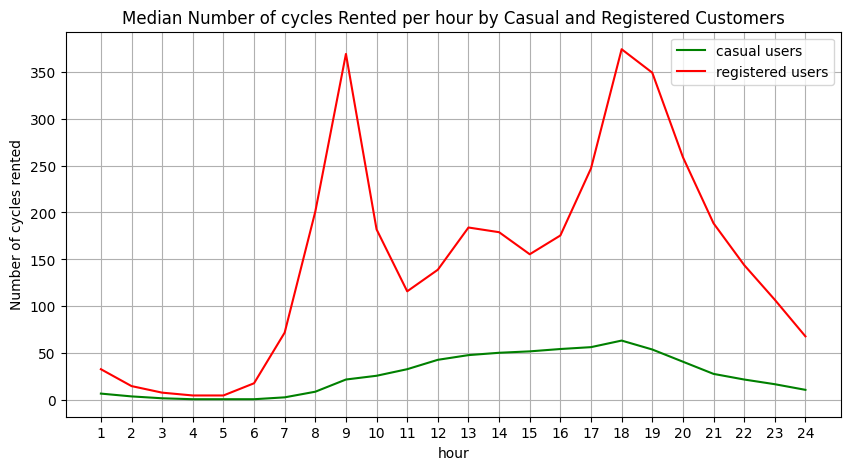

In [39]:
plt.figure(figsize=(10,5))
sns.lineplot(x = median_count_perHr["hour"],
             y = median_count_perHr["casual"],color="g",label='casual users')
sns.lineplot(x = median_count_perHr["hour"],
             y = median_count_perHr["registered"],color="r",label='registered users')
plt.legend()
plt.title("Median Number of cycles Rented per hour by Casual and Registered Customers")
plt.grid()
plt.xticks(np.arange(1,25,1))
plt.ylabel("Number of cycles rented")
plt.show()

**From above linplot :** 
- **registered customers seems to be using rental cycles mostly for work-commute purposes.** 
- **registered cycle counts seems to be much higher than the casual customers.** 

In [40]:
print("Casual Users (in %) :")
(data["casual"].sum()/data["count"].sum())*100

Casual Users (in %) :


18.8031413451893

In [41]:
print("Registered Users (in %) : ")
(data["registered"].sum()/data["count"].sum())*100

Registered Users (in %) : 


81.1968586548107

**81% cycles had been rented by registered customers.** 

**19% cycles had been rented by casual customers.** 

### Using Bootrsapping : Confidence Interval of Mean Number of cycles Rented by Casual And Registered Customers  :

In [42]:
def Confidence_Interval_Bootstrapping(data, confidence=95 , sample_size = 30000,trials = 200):
    
    
    '''
    data : array
    confidence level : Required Confidence Level
    Sample Size  : length of Sample Size
    Trials : How many times we take sample sample from data. 
    '''
    print("Data Distribution before Sampling/Bootstrap:  Data Distribution After Sampling/Bootstraping")
    
   
    bootstrapped_mean= np.empty(trials)

    for i in range(trials):
        btssample = data.sample(n=sample_size,replace=True)
        bootstrapped_mean[i] = np.mean(btssample)
   
    print()
    sample_mean = np.mean(bootstrapped_mean)
    sample_std = np.std(data)
    standard_error = sample_std/np.sqrt(sample_size)
    talfa_by2 = t.ppf((1-((1-(confidence)/100)/2)),df = sample_size-1)
    margin_of_error = talfa_by2*standard_error
    print("sample mean :",sample_mean)
    print("sample standard deviation :",sample_std)
    print("sample size: ",sample_size)
    plt.figure(figsize=(16,5))
    plt.subplot(121)
    sns.distplot(data,bins = 15)
    
    plt.subplot(122)
    
    sns.distplot(bootstrapped_mean,bins = 15)

    lower_ = sample_mean - margin_of_error
    upper_ = sample_mean + margin_of_error
    CI = (lower_,upper_)

    plt.axvline(x = lower_,c = "r")
    plt.axvline(x = upper_,c = "r")
    plt.show()



    print("Confidence Interval : ",CI)

#### Confidence Interval of Average Number of Cycles Rented by Registered Customers

Data Distribution before Sampling/Bootstrap:  Data Distribution After Sampling/Bootstraping

sample mean : 155.5905205
sample standard deviation : 151.03209561628546
sample size:  30000


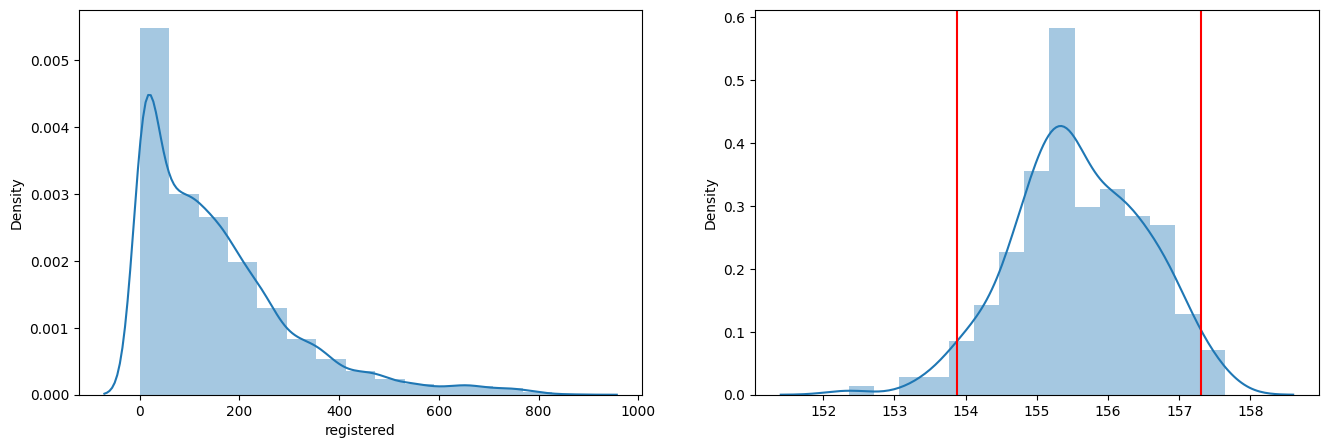

Confidence Interval :  (153.88139389432789, 157.2996471056721)


In [43]:
Confidence_Interval_Bootstrapping(data["registered"])

#### Confidence Interval of Average Number of Cycles Rented by Casual Customers

Data Distribution before Sampling/Bootstrap:  Data Distribution After Sampling/Bootstraping

sample mean : 36.007485
sample standard deviation : 49.958181807631085
sample size:  30000


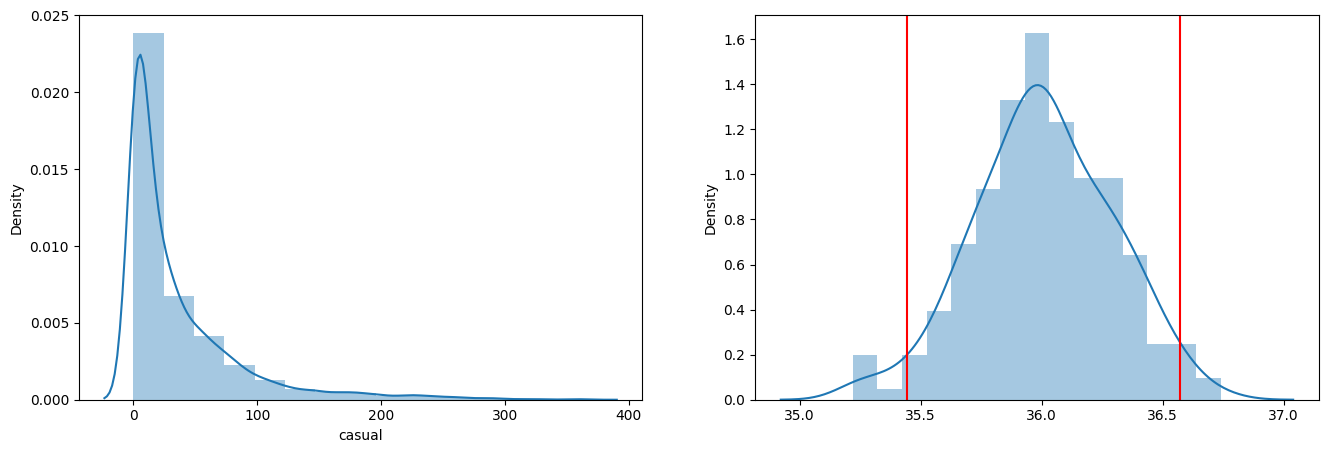

Confidence Interval :  (35.442142531897346, 36.57282746810266)


In [44]:
Confidence_Interval_Bootstrapping(data["casual"])

# Hourly median number of cycles rented during the day : 

In [53]:
import plotly.express as px

fig = px.bar(y = data.groupby("hour")["count"].median(),
 x = data.groupby("hour")["count"].median().index,text_auto='.2s',
     labels={
     "x": "Hours",
    "y": "Median value of Number of cycles rented",}
     ,title="Median Number of cycles Rented per hour during a day"
 )

fig.update_layout(
     xaxis = dict(
     tickmode = 'linear',
     tick0 = 0,
     dtick = 1
     )
)

fig.show()

- **from above bar chart :** 
- **shows the median value of number  of cycles were rented during perticular hour of the day.**

- **Median of number of cycles rented are higher during morning 7 to 9 am to evening 4 to 8pm .**



# Effect of seasons on number of cycles rented during hours : 

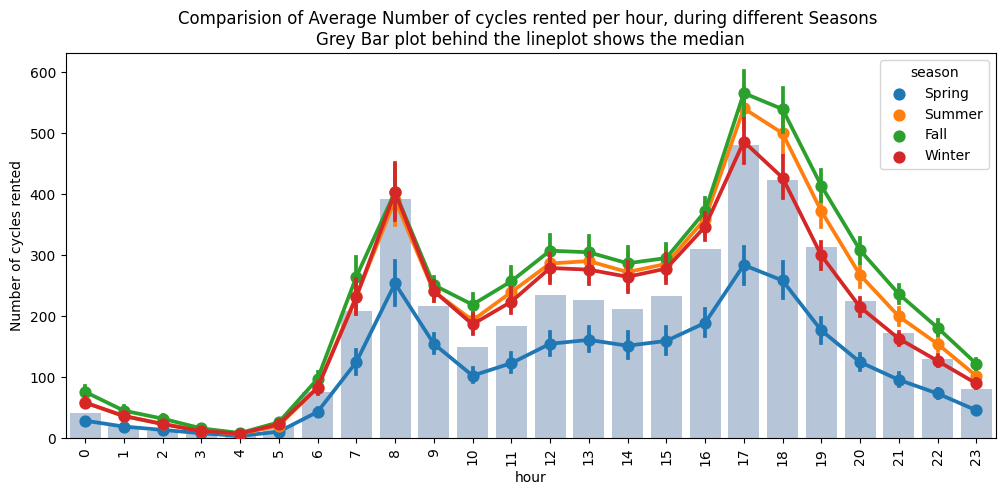

In [54]:
plt.figure(figsize=(12,5))
sns.barplot(y = data.groupby("hour")["count"].median(),
           x = data.groupby("hour")["count"].median().index,
            color="lightsteelblue")
sns.pointplot(x = data["hour"],
              y= data["count"],
              hue=data["season"],
              ci=95)
plt.title("Comparision of Average Number of cycles rented per hour, during different Seasons \nGrey Bar plot behind the lineplot shows the median")
plt.xticks(rotation = 90)
plt.ylabel("Number of cycles rented")
plt.show()

**during the morning 7-9am and afternoon 4pm to 7pm , the cycles rent counts is increasing.**

**during the spring season , looks like people prefer less likely to rent the cycle.**

#### Number of cycles rented during differnet seasons (in %) :`


In [55]:
season_wise_rent_percentage = data.groupby("season")["count"].sum()/np.sum(data["count"])*100

In [56]:
season_wise_rent_percentage

season
Fall      30.720181
Spring    14.984493
Summer    28.208524
Winter    26.086802
Name: count, dtype: float64

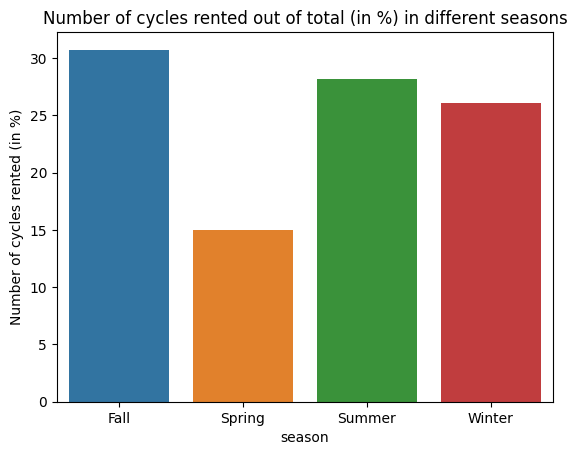

In [57]:
sns.barplot(x= season_wise_rent_percentage.index,
           y = season_wise_rent_percentage)
plt.ylabel("Number of cycles rented (in %)")
plt.title("Number of cycles rented out of total (in %) in different seasons")
plt.show()

# weather effect on cycle rental median counts hourly : 

In [58]:
weather_wise_rent_percentage = data.groupby("weather")["count"].sum()/np.sum(data["count"])*100
weather_wise_rent_percentage

weather
Clear          70.778230
Cloudy         24.318669
Heavy Rain      0.007864
Little Rain     4.895237
Name: count, dtype: float64

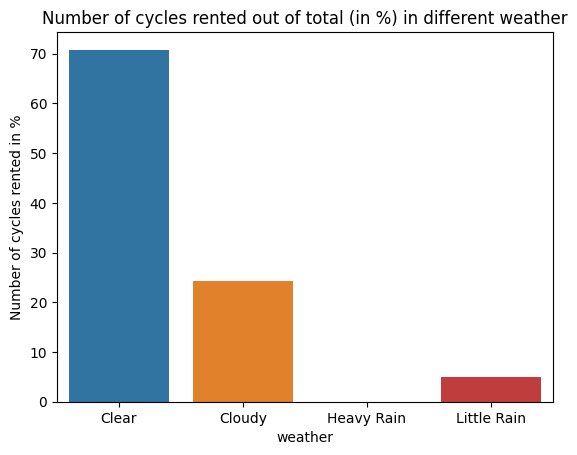

In [59]:
sns.barplot(x= weather_wise_rent_percentage.index,
           y = weather_wise_rent_percentage)
plt.title("Number of cycles rented out of total (in %) in different weather")

plt.ylabel("Number of cycles rented in %")
plt.show()

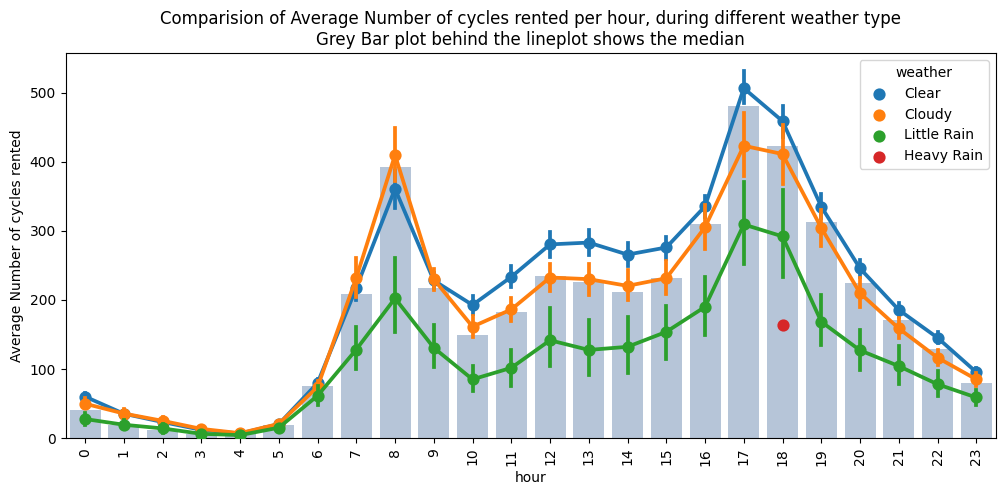

In [60]:
plt.figure(figsize=(12,5))
sns.barplot(y = data.groupby("hour")["count"].median(),
           x = data.groupby("hour")["count"].median().index,
            color="lightsteelblue")
sns.pointplot(x = data["hour"],
              y= data["count"],
              hue=data["weather"],
              ci=95)
plt.title("Comparision of Average Number of cycles rented per hour, during different weather type\nGrey Bar plot behind the lineplot shows the median")

plt.xticks(rotation = 90)
plt.ylabel("Average Number of cycles rented")
plt.show()

**70% of the cycles were rented when it was clear weather.** 

**24% when it was cloudy weather .** 

**during rainy weather , only around 5% of the cycles were rented.**

# Distributions and Comparision of number of cycles rented during working days and off day , across different seasons.

- ### Boxplot - distribution of number of bike rented , during different weather as per workingday or not! 

In [61]:
fig = px.box(data, x="weather", y="count", color="workingday",
            title="Number of cycles rented Boxplot during Workday and Offday as per different weather conditions")

fig.show()

>**from above boxplot, we can say , there's no significant activity during heavy rain weather.**

>**High activity during clear and cloudy weather.** 

- ### Boxplot - distribution of number of bike rented , during different seasons as per workingday or not! 

In [62]:
fig = px.box(data, x="season", y="count", color="workingday",
             title="Number of cycles rented Boxplot during Workday and Offday as per different seasons")
fig.show()

>**during spring season , number of bike rented were lower than summer and fall.** 
    

# overview on distributions  of Numerical Features : 

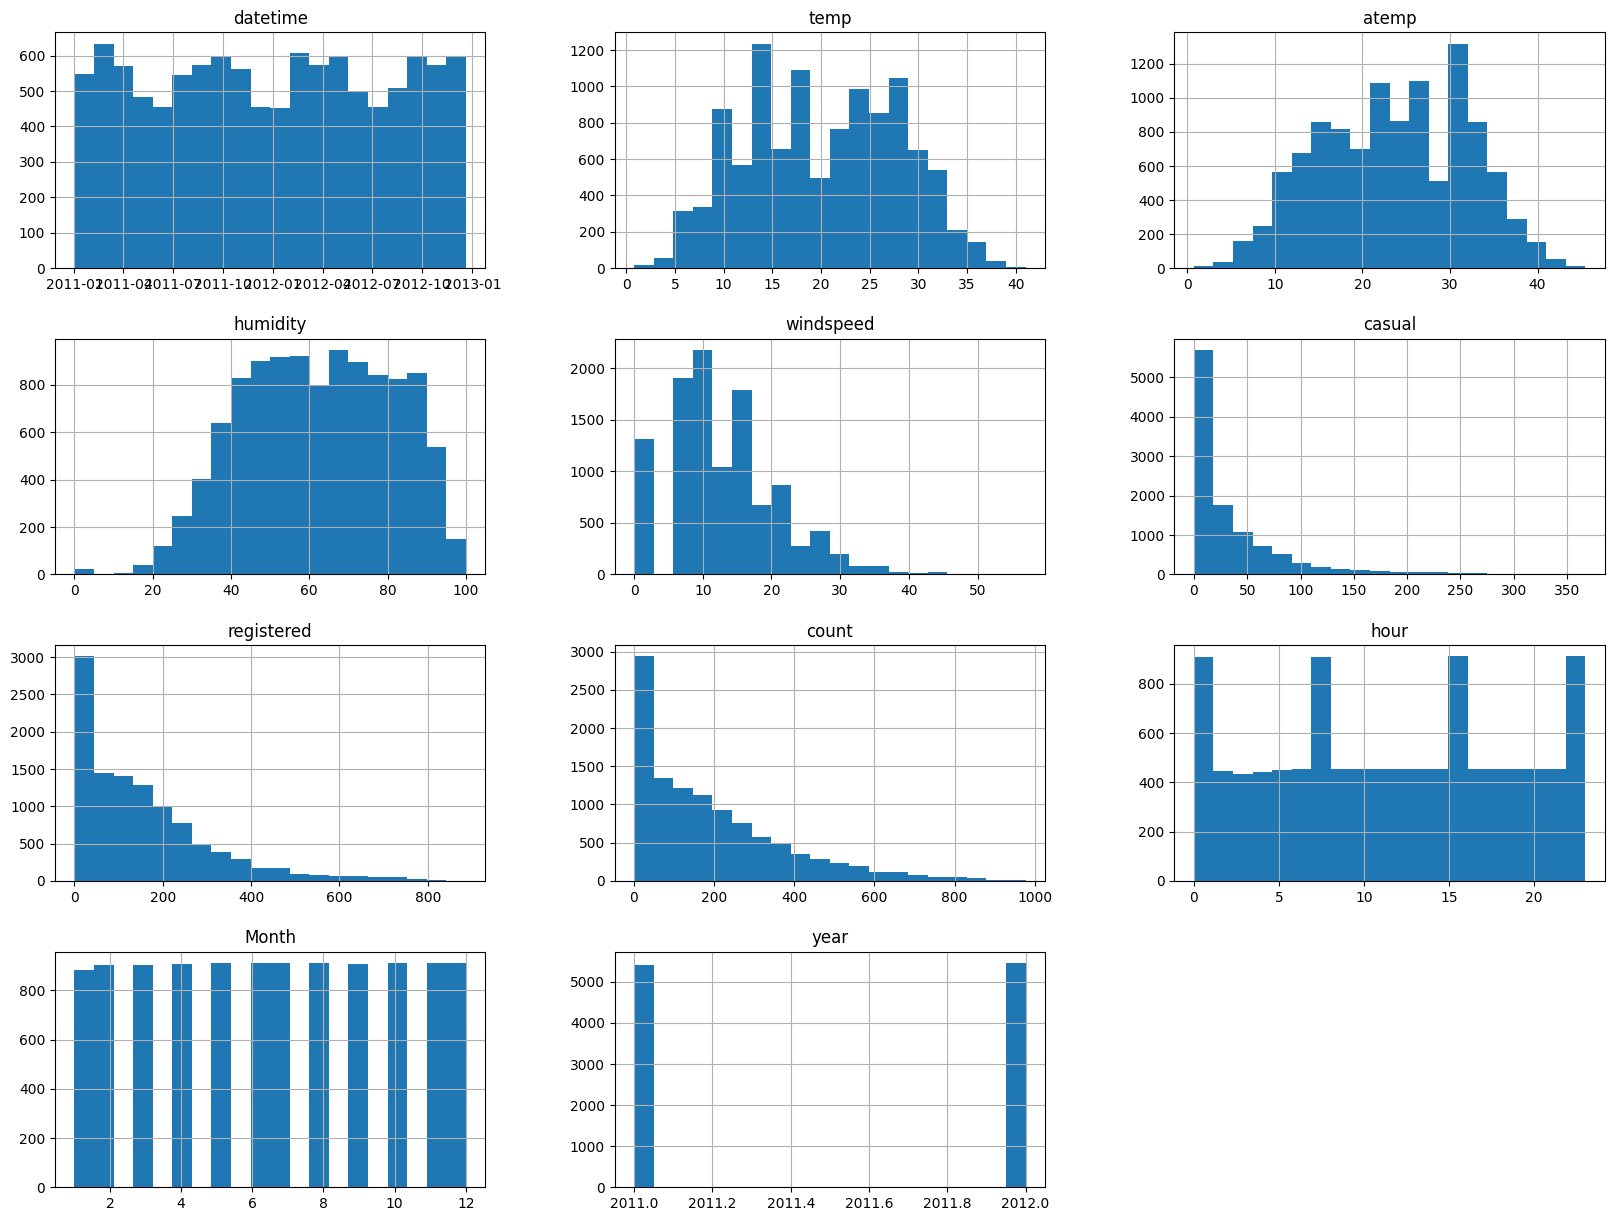

In [64]:

data.hist(bins=20,figsize=(20,15))
plt.show()

**From above distribution plots of number of bikes rented , are not normally distributed.** 
>- also that there are outliers in the data and overall distributions are heavily right skewed . 

>- data need to be tranformed for hypothesis test calculations further.

# Yearly difference in number of bike rental : 

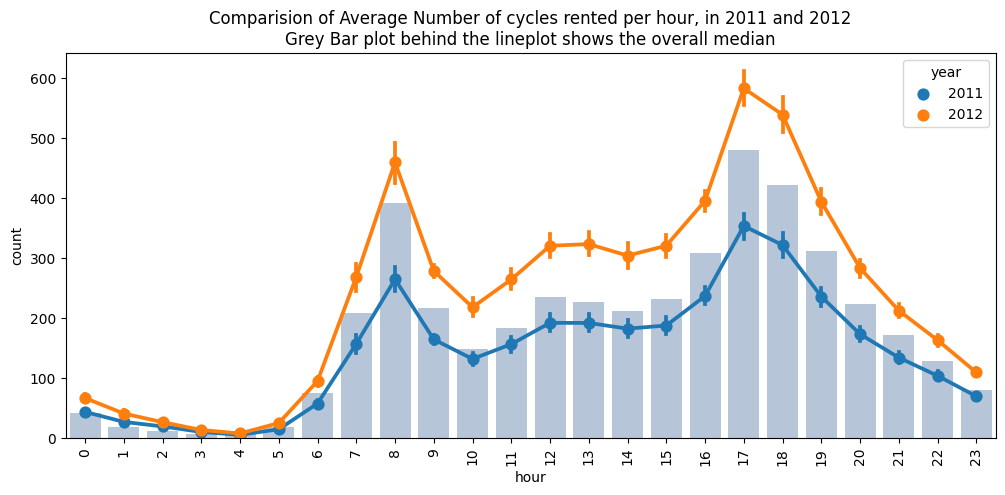

In [65]:
plt.figure(figsize=(12,5))
sns.barplot(y = data.groupby("hour")["count"].median(),
           x = data.groupby("hour")["count"].median().index,
            color="lightsteelblue")
sns.pointplot(x = data["hour"],
              y= data["count"],
              hue=data["year"],
              ci=95)
plt.title("Comparision of Average Number of cycles rented per hour, in 2011 and 2012\nGrey Bar plot behind the lineplot shows the overall median")
plt.xticks(rotation = 90)
plt.show()

>**hourly  average bike rented in year 2011 and 2012** 

In [66]:
data.groupby("year")["count"].median()

year
2011    111.0
2012    199.0
Name: count, dtype: float64

In [67]:
(((199-111)/111))*100

79.27927927927928

>**from 2011  , there's 79.27% hike in hourly median number of bike rental.** 

In [68]:
data.groupby("year")["casual"].median()

year
2011    13.0
2012    20.0
Name: casual, dtype: float64

In [69]:
data.groupby("year")["registered"].median()

year
2011     91.0
2012    161.0
Name: registered, dtype: float64

In [70]:
(((161-91)/91))*100

76.92307692307693

>**in registered customers , 76% hike in hourly median cycle rental from 2011 to 2012.** 
     
>**in 2011 , median number of hourly rental were 13 , and in 2012 , its 20.**
     -

## Number and cycles rented and temperature correlation : 

In [71]:
fig = px.scatter(data, x="count", y="atemp",  color="count", trendline="ols",
                title="temperature correlation with Number of bikes rented")
fig.show()

- **from scatter plot , there's a positive correlation across temperature and number of bikes rented.** 


- **After categorising the temperature as low, verylow, moderate, high :** 

In [72]:
data["temperature"].value_counts()

moderate    4767
low         4318
very low    1014
high         787
Name: temperature, dtype: int64

In [73]:
fig = px.box(data, x="temperature", y="count", color="workingday",
            title= "Boxplots of Number of cycles rented distribution as per working day or offday in different temperatures")
fig.show()

**from above boxplot :** 

**number of bike rented during moderate to high temerature is significantly higher than lower temperature.** 

# offday vs working day number of cycles rented trend during a day : 

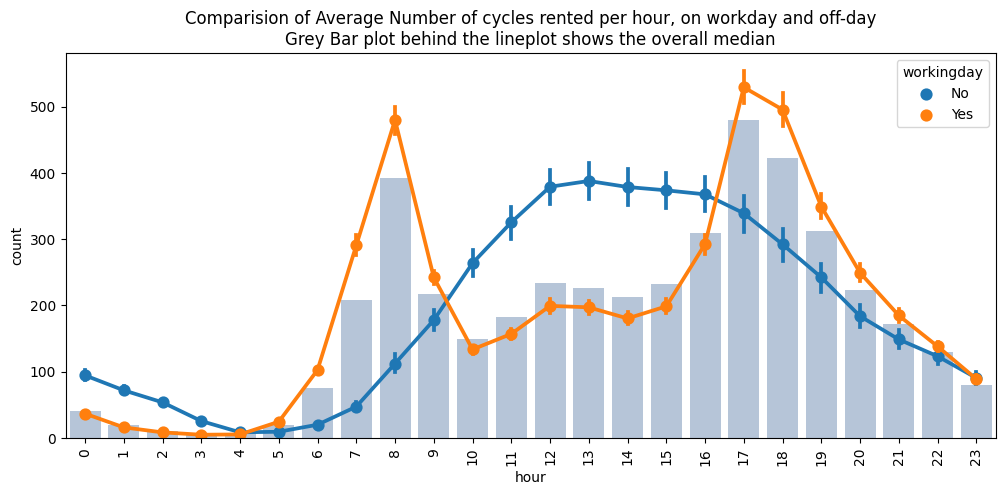

In [75]:
plt.figure(figsize=(12,5))
sns.barplot(y = data.groupby("hour")["count"].median(),
           x = data.groupby("hour")["count"].median().index,
            color="lightsteelblue")
sns.pointplot(x = data["hour"],
              y= data["count"],
              hue=data["workingday"],
              ci=95)
plt.title("Comparision of Average Number of cycles rented per hour, on workday and off-day\nGrey Bar plot behind the lineplot shows the overall median")

plt.xticks(rotation = 90)
plt.show()

**number of cycles rented changed as per working day and off-day . trend is opposite.**

**on off days , number of cycles rented increases during the day time ! which is opposite of during working days.**

**from above plot it looks like, working day count of cycle rented seems to be higher than offday! 
 lets do a AB test : weather mean of rented cycled on working day and offdays are same or not !** 

##### hourly median  number of cycles rented during

In [76]:
data.groupby("workingday")["count"].median()

workingday
No     128.0
Yes    151.0
Name: count, dtype: float64

##### hourly average  number of cycles rented during

In [77]:
data.groupby("workingday")["count"].mean()

workingday
No     188.506621
Yes    193.011873
Name: count, dtype: float64

##### Boxplot : number of bikes rented during working day and off-day : 

In [78]:
fig = px.box(data, x="workingday", y="count",
            title="Boxplot shows the distribution of number of bikes rented on offdays and workingdays")
fig.show()

 - **from above boxplot ,** 
 - **distributions of hourly number of bike rented during working day and off day seems similar .** 
 - **though there are more outliers in workinday category.** 

### Distribution Plot of Number of Cycles Rented by Registered and Casual Customers 

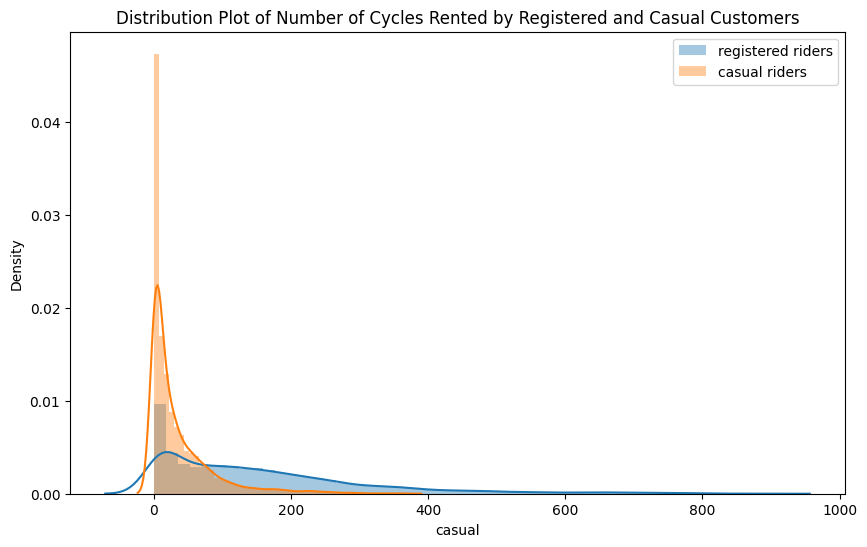

In [79]:
plt.figure(figsize=(10,6))

sns.distplot(data["registered"], label = "registered riders")
sns.distplot(data["casual"], label = "casual riders")
plt.title("Distribution Plot of Number of Cycles Rented by Registered and Casual Customers")
plt.legend()
plt.show()

### testing if mean number of electric cycles rented on workday is equal to on offday ! 

## t-test : 
### If working day and offday has an effect on the number of electric cycles rented.



###### distribution of number of bikes rented as per working day or offday (in percentages )

In [80]:
data.groupby("workingday")["count"].sum()/np.sum(data["count"])*100

workingday
No     31.40156
Yes    68.59844
Name: count, dtype: float64

In [81]:
workingday = data.loc[data["workingday"]=="Yes"]["count"]
offday = data.loc[data["workingday"]=="No"]["count"]

- Establishing Hypothesis :     
    
        H0: average # of cycles rented on workingdays   =   average # of cycles rented on offday 
        Ha: average # of cycles rented on workingdays  !=   average # of cycles rented on offday 

In [82]:
m1 = np.mean(workingday)
n1 = len(workingday)
s1 = np.std(workingday,ddof = 1)

m2 = np.mean(offday)
n2 = len(offday)
s2 = np.std(offday,ddof = 1)


In [83]:
m1,m2,m1-m2

(193.01187263896384, 188.50662061024755, 4.505252028716285)

  **calulating Test Statistic :** 

In [84]:
T_observed =(m1-m2)/(np.sqrt(((s1**2)/n1)+((s2**2)/n2)))
T_observed

1.2362580418223226

  **p-Value :** 

In [87]:
p_value = 2*(1-t.cdf(T_observed,n1+n2-2))
p_value

0.21638933990348108

 **Extream Critical Value**

In [89]:
T_critical = t.ppf(0.975,n1+n2-2)
T_critical

1.9601819678713073

In [90]:
p_value > 0.05

True

In [91]:
-T_critical <  T_observed < T_critical 

True

**we failed to reject null Hypothesis** 

**mean of number of cycles rented on** 

**working days are equal as the cycles rented on offdays.** 

#  Month and season wise , effect on median and average number of cycles rented .

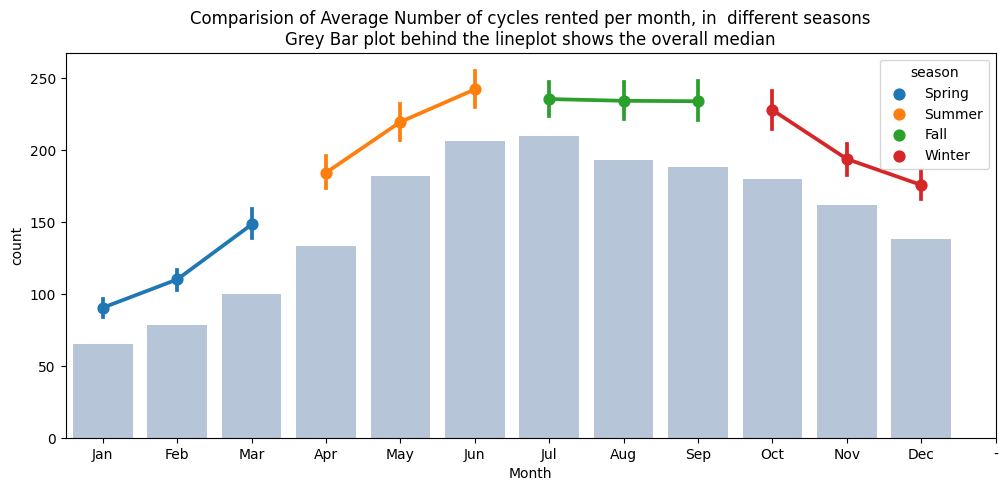

In [92]:
plt.figure(figsize=(12,5))
sns.barplot(y = data.groupby("Month")["count"].median(),
           x = data.groupby("Month")["count"].median().index,
           color="lightsteelblue")
sns.pointplot(x = data["Month"],
              y= data["count"],
              hue=data["season"],
              ci=95)
plt.title("Comparision of Average Number of cycles rented per month, in  different seasons\nGrey Bar plot behind the lineplot shows the overall median")

plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12],["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec","-"])

plt.show()

 **cycle rental counts decreased during winter season and opering spring seaosn .**

 **During Summer season , count increase and stays a constant till pre-winter season .** 
 
 **From May to November the number of cycles rented are increasing**


# temperature effect on cycle rental

In [93]:
temperature_wise_rent_percentage = data.groupby("temperature")["count"].sum()/np.sum(data["count"])*100
temperature_wise_rent_percentage

temperature
high        12.487269
low         30.172248
moderate    53.538617
very low     3.801866
Name: count, dtype: float64

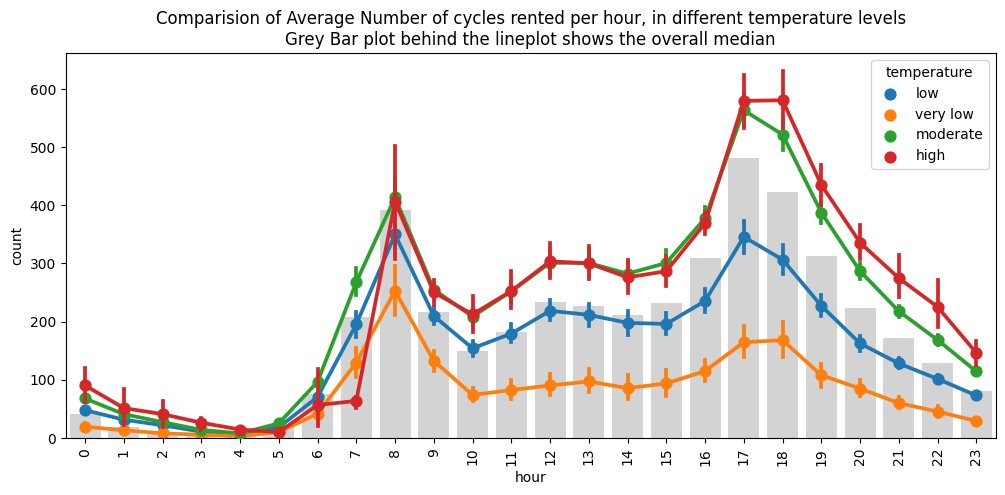

In [94]:
plt.figure(figsize=(12,5))
sns.barplot(y = data.groupby("hour")["count"].median(),
           x = data.groupby("hour")["count"].median().index,
            color="lightgrey")
sns.pointplot(x = data["hour"],
              y= data["count"],
              hue=data["temperature"],
              ci=95)
plt.title("Comparision of Average Number of cycles rented per hour, in different temperature levels\nGrey Bar plot behind the lineplot shows the overall median")

plt.xticks(rotation = 90)
plt.show()

**Average Number of Bikes rented are higher in moderate to high temperature.** 

**which decreases when temperature is low to very low!** 


# humidity  vs count

In [95]:
fig = px.scatter(data, y="count", x="humidity",  color="weather", trendline="ols",
                title=" correlation between humidity and number of bikes rented during different weather")
fig.show()

**Scatter plot above , shows kind of a negative correlation , between humidity and number of bikes rented.**
**After Categorising Humidity level , we can see**

In [96]:
humidity_wise_rent_percentage = data.groupby("gethumidity")["count"].sum()/np.sum(data["count"])*100
humidity_wise_rent_percentage

gethumidity
10%      0.038696
100%     2.565314
20%      0.635970
30%      5.942528
40%     15.798887
50%     19.659541
60%     18.030512
70%     16.507215
80%     11.268459
90%      9.552879
Name: count, dtype: float64

**Counts are increasing from humidity level of 40% to 70% .**

**40 to 70% humidity level seems to be most comfortable for cycling.**

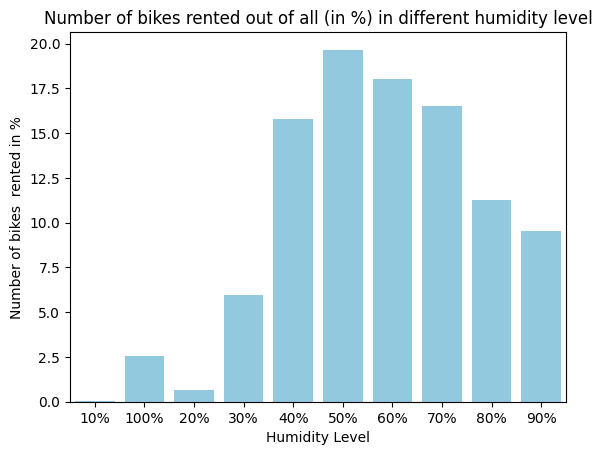

In [97]:
sns.barplot(x= humidity_wise_rent_percentage.index,
           y = humidity_wise_rent_percentage,color="skyblue")
plt.title("Number of bikes rented out of all (in %) in different humidity level")
plt.ylabel("Number of bikes  rented in %")
plt.xlabel("Humidity Level")
plt.show()

# Windspeed vs count : 

In [98]:
fig = px.scatter(data, y="count", x="windspeed",  color="weather", trendline="ols",
                title= "Correlation of Windspeed with Count of bikes rented during different weather")
fig.show()

In [99]:
windspeed_wise_rent_percentage = data.groupby("windspeed_category")["count"].sum()/np.sum(data["count"])*100
windspeed_wise_rent_percentage

windspeed_category
(-0.001, 6.003]     16.325482
(6.003, 7.002]       8.421435
(7.002, 8.998]       9.433002
(8.998, 12.998]     20.356743
(12.998, 15.001]     9.715336
(15.001, 16.998]     8.488901
(16.998, 22.003]    15.682703
(22.003, 56.997]    11.576398
Name: count, dtype: float64

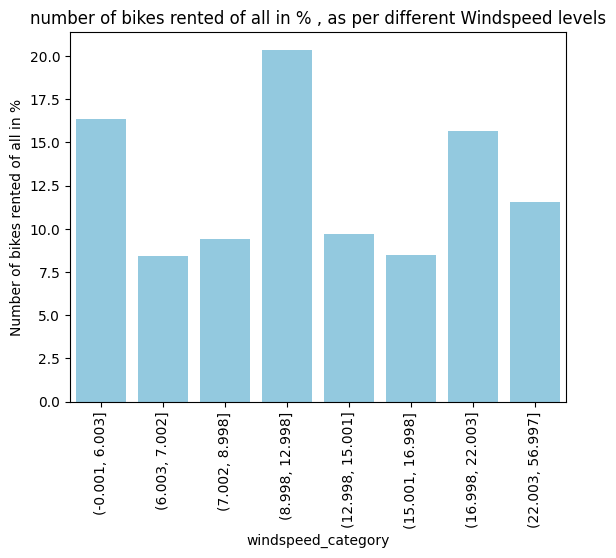

In [100]:
sns.barplot(x= windspeed_wise_rent_percentage.index,
           y = windspeed_wise_rent_percentage,color="skyblue")
plt.title("number of bikes rented of all in % , as per different Windspeed levels")
plt.ylabel("Number of bikes rented of all in %")
plt.xticks(rotation =90)
plt.show()

**from above, plot:**

**windspeed are categorised in different groups .**

**Windspeed increases , the number of bike rented are decreases.**

**Most often windspeed is 8 to 24.** 

# Test for Independence between few categorical features. : 

# If Weather is dependent on the season 

### chi-square test : for independence : 

**weather and season are categorical variables** 

>**for dependency : chi square test  :** 

>**H0: weather and seasons are independent** 

>**Ha: weather and seasons are dependent** 


In [101]:
temp_data = data[data["weather"].isin(["Little Rain","Clear","Cloudy"])]

In [102]:
observed = pd.crosstab(index = temp_data["season"],
           columns = temp_data["weather"],
            values= temp_data["count"],
           aggfunc=np.sum
           )

In [103]:
observed

weather   Clear  Cloudy  Little Rain
season                              
Fall     470116  139386        31160
Spring   223009   76406        12919
Summer   426350  134177        27755
Winter   356588  157191        30255

In [106]:
row_sum = np.array(np.sum(observed,axis = 1))
col_sum = np.array(np.sum(observed,axis = 0))

In [108]:
row_sum

array([640662, 312334, 588282, 544034], dtype=int64)

In [109]:
col_sum

array([1476063,  507160,  102089], dtype=int64)

In [110]:
pd.crosstab(index = temp_data["season"],
           columns = temp_data["weather"],
               values= temp_data["count"],
           aggfunc=np.sum,
            margins=True         )


weather    Clear  Cloudy  Little Rain      All
season                                        
Fall      470116  139386        31160   640662
Spring    223009   76406        12919   312334
Summer    426350  134177        27755   588282
Winter    356588  157191        30255   544034
All      1476063  507160       102089  2085312

In [111]:
expected = []
for i in row_sum:
    expected.append((i*col_sum)/np.sum(np.sum(observed,axis = 0)))
expected

[array([453484.88557396, 155812.72247031,  31364.39195574]),
 array([221081.86259035,  75961.44434981,  15290.69305984]),
 array([416408.3330293 , 143073.60199337,  28800.06497733]),
 array([385087.91880639, 132312.23118651,  26633.8500071 ])]

In [112]:
expected = pd.DataFrame(expected,columns=observed.columns)


In [113]:
expected.index = observed.index

In [114]:
expected

weather          Clear         Cloudy   Little Rain
season                                             
Fall     453484.885574  155812.722470  31364.391956
Spring   221081.862590   75961.444350  15290.693060
Summer   416408.333029  143073.601993  28800.064977
Winter   385087.918806  132312.231187  26633.850007

In [115]:
T_observed = np.sum(np.sum(((observed-expected)**2)/expected))

In [116]:
T_observed

10838.372332480216

In [117]:
df = (len(observed)-1)*(len(observed.columns)-1)

In [122]:
import scipy

T_critical = scipy.stats.chi2.ppf(0.95,df)
T_critical

12.591587243743977

In [124]:
p_value = 1-scipy.stats.chi2.cdf(T_observed,df)
p_value


0.0

In [125]:
if T_observed > T_critical:
    print("Reject Null Hypothesis : \nWeather and Season are dependent variables")
else:
    print("Failed to Reject Null Hypothesis :\nWeather and Season are independent Variables")

Reject Null Hypothesis : 
Weather and Season are dependent variables


**From ChiSquare test of independece :**

**We reject Null hyothesis as independence:**

 
**Conclude that weather and seasons are Dependent Features.** 

In [126]:
# using library

In [127]:
scipy.stats.chi2_contingency(observed)

Chi2ContingencyResult(statistic=10838.372332480214, pvalue=0.0, dof=6, expected_freq=array([[453484.88557396, 155812.72247031,  31364.39195574],
       [221081.86259035,  75961.44434981,  15290.69305984],
       [416408.3330293 , 143073.60199337,  28800.06497733],
       [385087.91880639, 132312.23118651,  26633.8500071 ]]))

In [138]:
def chi2Test_of_independence(table):
    print(table)
    observed = table.fillna(0)
    row_sum = np.array(np.sum(observed,axis = 1))
    col_sum = np.array(np.sum(observed,axis = 0))
    expected = []
    
    for i in row_sum:
        expected.append((i*col_sum)/np.sum(np.sum(observed,axis = 0)))
    expected = pd.DataFrame(expected,columns=observed.columns)

    expected.index = observed.index
    
    print()
    print((expected))
    
    T_observed = np.sum(np.sum(((observed-expected)**2)/expected))
    df = (len(observed)-1)*(len(observed.columns)-1)
    T_critical = scipy.stats.chi2.ppf(0.95,df)
    p_value = 1-scipy.stats.chi2.cdf(T_observed,df)
    
    print("T_statistic : ",np.round(T_observed,3),"\np_value : ",p_value)
    
    if T_observed > T_critical:
        print("Reject Null Hypothesis")
    else:
        print("Failed to Reject Null Hypothesis")

In [141]:
chi2Test_of_independence(observed)

weather   Clear  Cloudy  Little Rain
season                              
Fall     470116  139386        31160
Spring   223009   76406        12919
Summer   426350  134177        27755
Winter   356588  157191        30255

weather          Clear         Cloudy   Little Rain
season                                             
Fall     453484.885574  155812.722470  31364.391956
Spring   221081.862590   75961.444350  15290.693060
Summer   416408.333029  143073.601993  28800.064977
Winter   385087.918806  132312.231187  26633.850007
T_statistic :  10838.372 
p_value :  0.0
Reject Null Hypothesis


# If weather and temperature are dependent :



>**for dependency : chi square test  :** 

>**H0: weather and temperature are independent** 

>**Ha: weather and temperature are dependent** 


In [139]:
observed_temp_weather = pd.crosstab(index=temp_data["weather"],
           columns= temp_data["temperature"],
                                   values=temp_data["casual"],
                                   aggfunc=np.sum)

In [140]:
chi2Test_of_independence(observed_temp_weather)

temperature   high    low  moderate  very low
weather                                      
Clear        52538  56379    177592      3391
Cloudy       11496  23163     51780       807
Little Rain   1726   3249      9869       139

temperature          high           low       moderate     very low
weather                                                            
Clear        48616.205381  61207.181565  176870.279678  3206.333375
Cloudy       14631.146791  18420.426916   53229.473683   964.952610
Little Rain   2512.647828   3163.391519    9141.246638   165.714015
T_statistic :  2979.804 
p_value :  0.0
Reject Null Hypothesis


**"Weather and Ttemperature are dependent variables"**

In [142]:
# using library , varifying implementation with library results. 

In [143]:
scipy.stats.chi2_contingency(observed_temp_weather)

Chi2ContingencyResult(statistic=2979.8035003021923, pvalue=0.0, dof=6, expected_freq=array([[4.86162054e+04, 6.12071816e+04, 1.76870280e+05, 3.20633337e+03],
       [1.46311468e+04, 1.84204269e+04, 5.32294737e+04, 9.64952610e+02],
       [2.51264783e+03, 3.16339152e+03, 9.14124664e+03, 1.65714015e+02]]))

# If Weather and Humidity Level are dependent : 



>**for dependency : chi square test  :** 

>**H0: weather and Humidity are independent** 

>**Ha: weather and Humidity are dependent** 


In [144]:
chi2Test_of_independence(pd.crosstab(index=temp_data["weather"],
           columns= temp_data["gethumidity"],
                                     values=temp_data["casual"],
                                   aggfunc=np.sum
                                    ))

gethumidity   10%    100%     20%      30%      40%      50%      60%  \
weather                                                                 
Clear        35.0   635.0  4374.0  26879.0  68726.0  69117.0  53398.0   
Cloudy        6.0  2385.0    51.0   3236.0   7090.0  13370.0  15420.0   
Little Rain  40.0  1681.0     NaN      NaN    357.0    925.0   1099.0   

gethumidity      70%      80%      90%  
weather                                 
Clear        38241.0  19202.0   9293.0  
Cloudy       20060.0  13803.0  11825.0  
Little Rain   2499.0   4355.0   4027.0  

gethumidity        10%         100%          20%           30%           40%  \
weather                                                                        
Clear        59.883100  3475.437675  3271.391557  22263.945028  56314.510531   
Cloudy       18.021942  1045.940101   984.532003   6700.379951  16947.967526   
Little Rain   3.094959   179.622224   169.076439   1150.675020   2910.521943   

gethumidity           50%  

**From the dependency test :**

**we can conclude that weather and humidity are dependent features.** 

# checking if the distribution of number of cycles rented are similar in different weather. 

# If Average No. of cycles rented is similar or different in different weather

In [145]:
data["weather"].unique()

array(['Clear', 'Cloudy', 'Little Rain', 'Heavy Rain'], dtype=object)

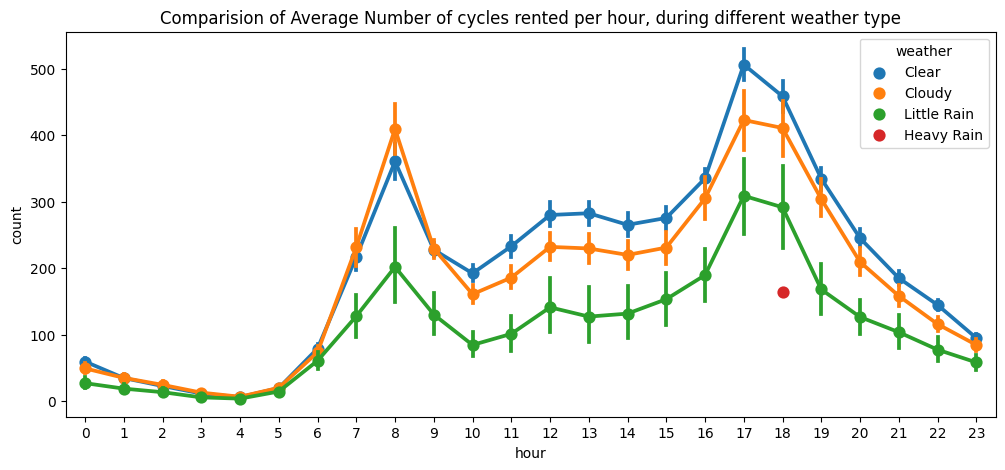

In [146]:
plt.figure(figsize=(12,5))
sns.pointplot(x = data["hour"],
              y= data["count"],
              hue=data["weather"],
              ci=95)
plt.title("Comparision of Average Number of cycles rented per hour, during different weather type")
plt.show()


- #### we have 4 different weather here, to check if there's significant differnece between 4 weathers , we can perform anova test : 



**H0: population mean of number of cycles rented in different seaons are same**

**Ha: population mean of number of cycles rented in different seaons are different**



In [147]:
Clear = data.loc[data["weather"]=="Clear"]["count"]
Cloudy = data.loc[data["weather"]=="Cloudy"]["count"]
Little_Rain = data.loc[data["weather"]=="Little Rain"]["count"]
Heavy_Rain = data.loc[data["weather"]=="Heavy Rain"]["count"]

In [148]:
len(Clear),len(Cloudy),len(Little_Rain),len(Heavy_Rain)

(7192, 2834, 859, 1)

In [153]:
Little_Rain

18        35
19        37
29         2
31         8
37        59
        ... 
10808    107
10818      5
10830    302
10837     47
10850    313
Name: count, Length: 859, dtype: int64

- **Heavy rain weather has only 1 record , exlcuding Heavy Rain weather from the test :**

   **checking the distribution before applying test :** 

<AxesSubplot: xlabel='count', ylabel='Density'>

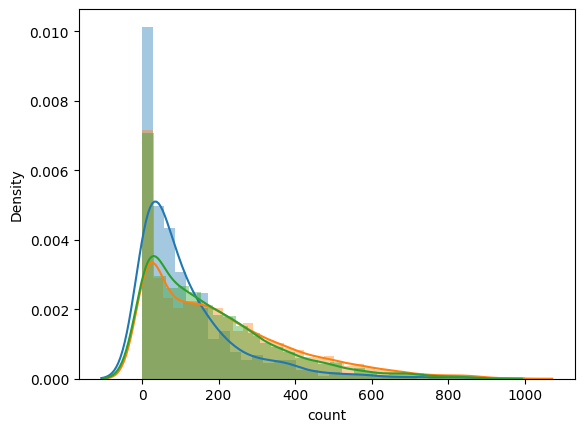

In [154]:
sns.distplot((Little_Rain))
sns.distplot((Clear))
sns.distplot((Cloudy))

**since the data is nomally distributed , assumption for anova test breaks.**

**applying Boxcox transformation and checking the distribution .**

In [159]:
scipy.stats.boxcox(Cloudy)

(array([ 0.        , 10.18366767, 10.70239397, ...,  4.73726102,
         4.29349317,  2.69323393]),
 0.31772875482731033)

<AxesSubplot: ylabel='Density'>

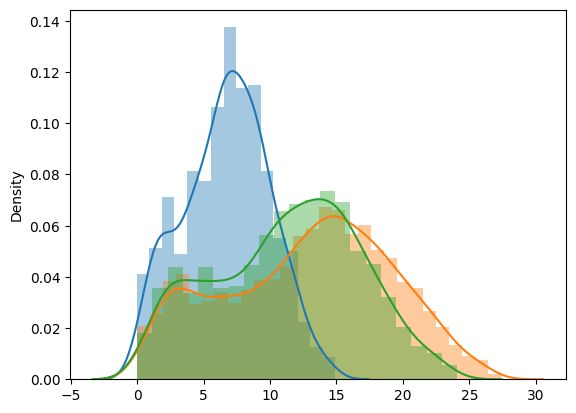

In [160]:
sns.distplot(scipy.stats.boxcox(Little_Rain)[0])
sns.distplot(scipy.stats.boxcox(Clear)[0])
sns.distplot(scipy.stats.boxcox(Cloudy)[0])

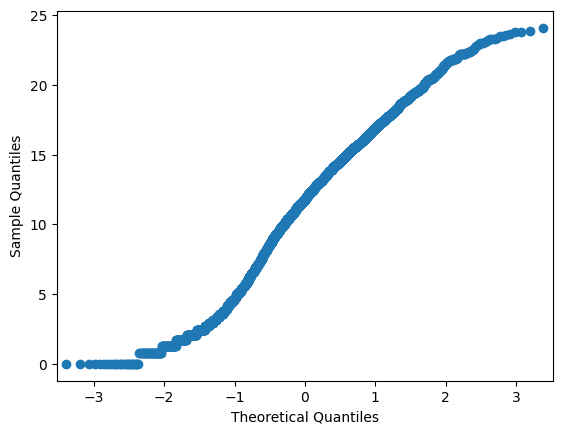

In [162]:
sm.qqplot((scipy.stats.boxcox(Cloudy)[0]))
plt.show()

**Testing if data is significantly normally distributed**

In [166]:
scipy.stats.anderson(Clear,dist="norm")


AndersonResult(statistic=209.40911708071326, critical_values=array([0.576, 0.656, 0.787, 0.917, 1.091]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=205.23679087875416, scale=187.9595660313149)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')

In [167]:
scipy.stats.anderson(Cloudy,dist="norm")

AndersonResult(statistic=90.59885984506127, critical_values=array([0.575, 0.655, 0.786, 0.917, 1.09 ]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=178.95553987297106, scale=168.36641290145073)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')

In [168]:
scipy.stats.anderson(Little_Rain,dist="norm")

AndersonResult(statistic=54.80752275061889, critical_values=array([0.573, 0.653, 0.783, 0.914, 1.087]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=118.84633294528521, scale=138.5812970523591)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')

**Since the datasets for tests, are not normally distributed, and having significance varinace between weathers ,** 

**we cannot perform anova test .**

## we can use non parametric test : Kruskal Wallis test : 

In [169]:
kr  = data[["weather","count"]]

In [170]:
kr = kr[kr["weather"].isin(['Clear', 'Cloudy', 'Little Rain'])]

In [171]:
kr["rank"] = kr["count"].rank()

In [172]:
rank_sum = kr.groupby("weather")["rank"].sum()
rank_sum = rank_sum.astype("int64")
rank_sum

weather
Clear          40752899
Cloudy         14990213
Little Rain     3503943
Name: rank, dtype: int64

In [173]:
N = len(kr)
N

10885

In [174]:
degree_of_freedom = kr["weather"].nunique()-1
degree_of_freedom


2

In [175]:
H = ((12/(N*(N+1)))*(np.sum(((rank_sum**2)/(kr.groupby("weather")["rank"].count())))))-(3*(N+1))
H

204.95101790400076

In [176]:
p_value = 1-scipy.stats.chi2.cdf(205.073,degree_of_freedom)
p_value

0.0

In [177]:
H_critical = scipy.stats.chi2.ppf(0.95,2)
H_critical

5.991464547107979

**H statistic from Kruskal Wallis test , is higher than the Critical Value ,**

**p_value is smaller than significant value 0.05 ,** 

**we reject Null Hypothesis.**

**Hence we conclude that the Population mean number of cycles rented across different weather are not same.** 

In [178]:
# using library : 

In [179]:
Clear = data.loc[data["weather"]=="Clear"]["count"]
Cloudy = data.loc[data["weather"]=="Cloudy"]["count"]
Little_Rain = data.loc[data["weather"]=="Little Rain"]["count"]

In [180]:
scipy.stats.kruskal(Clear,Cloudy,Little_Rain)

KruskalResult(statistic=204.95566833068537, pvalue=3.122066178659941e-45)

# # If No. of cycles rented is similar or different in different seasons

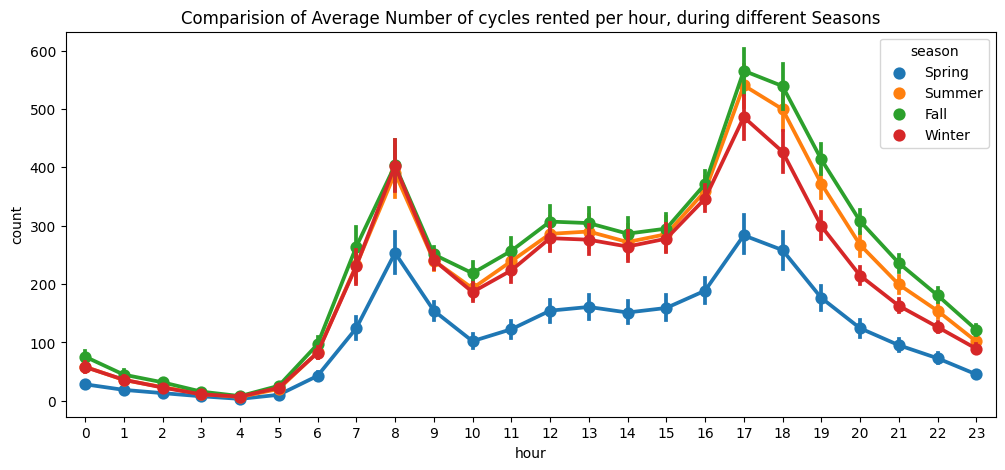

In [181]:
plt.figure(figsize=(12,5))
sns.pointplot(x = data["hour"],
              y= data["count"],
              hue=data["season"],
              ci=95)
plt.title("Comparision of Average Number of cycles rented per hour, during different Seasons")
plt.show()

In [182]:
Spring = data.loc[data["season"]=="Spring"]["count"]
Summer = data.loc[data["season"]=="Summer"]["count"]
Fall = data.loc[data["season"]=="Fall"]["count"]
Winter = data.loc[data["season"]=="Winter"]["count"]

In [183]:
len(Spring),len(Summer),len(Fall),len(Winter)

(2686, 2733, 2733, 2734)

<AxesSubplot: ylabel='Density'>

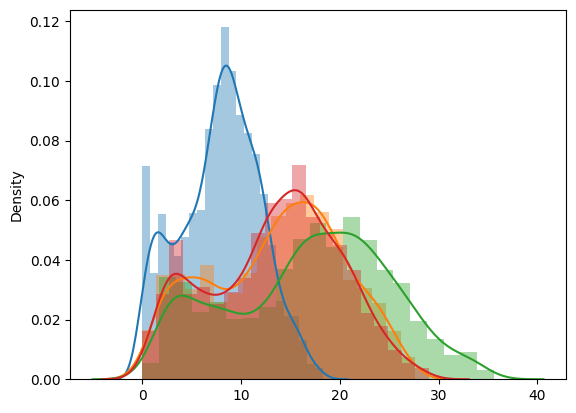

In [185]:
sns.distplot(scipy.stats.boxcox(Spring)[0])
sns.distplot(scipy.stats.boxcox(Summer)[0])
sns.distplot(scipy.stats.boxcox(Fall)[0])
sns.distplot(scipy.stats.boxcox(Winter)[0])

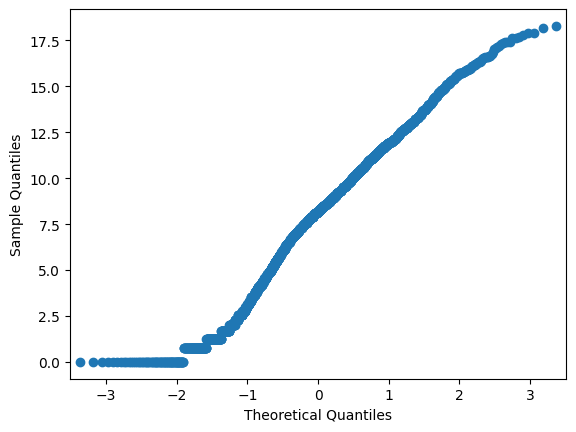

In [186]:
sm.qqplot((scipy.stats.boxcox(Spring)[0]))
plt.show()

**Testing if data is significantly normally distributed**

In [190]:
scipy.stats.anderson(Spring,dist="norm")

AndersonResult(statistic=134.99126589743582, critical_values=array([0.575, 0.655, 0.786, 0.917, 1.09 ]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=116.34326135517499, scale=125.27397388810313)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')

In [187]:
scipy.stats.anderson(Summer,dist="norm")


AndersonResult(statistic=73.98826756049948, critical_values=array([0.575, 0.655, 0.786, 0.917, 1.09 ]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=215.25137211855105, scale=192.00784313546262)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')

In [188]:
scipy.stats.anderson(Fall,dist="norm")


AndersonResult(statistic=54.3859876350034, critical_values=array([0.575, 0.655, 0.786, 0.917, 1.09 ]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=234.417124039517, scale=197.15100053680393)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')

In [189]:
scipy.stats.anderson(Winter,dist="norm")

AndersonResult(statistic=70.89794313022367, critical_values=array([0.575, 0.655, 0.786, 0.917, 1.09 ]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=198.98829553767374, scale=177.62240938763696)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')

**Since the datasets for tests, are not normally distributed, and having significance varinace between all seaons ,** 

**we cannot perform anova test .**

**we can use non parametric test : Kruskal Wallis test :** 

In [191]:
kr  = data[["season","count"]]
kr["rank"] = kr["count"].rank()
rank_sum = kr.groupby("season")["rank"].sum()
rank_sum = rank_sum.astype("int64")
N = len(kr)
degree_of_freedom = kr["season"].nunique()-1
H = ((12/(N*(N+1)))*(np.sum(((rank_sum**2)/(kr.groupby("season")["rank"].count())))))-(3*(N+1))
H

699.6499424783542

In [193]:
p_value = 1-scipy.stats.chi2.cdf(205.073,degree_of_freedom)
p_value


0.0

In [194]:
H_critical = scipy.stats.chi2.ppf(0.95,degree_of_freedom)
H_critical


7.814727903251179

In [195]:
H > H_critical

True

**H statistic from Kruskal Wallis test , is higher than the Critical Value ,**
**p_value is smaller than significant value 0.05 ,** 

**we reject Null Hypothesis.** 

**Hence we conclude that the Population mean number of cycles rented across different Seasons are not same.**

In [197]:
Spring = data.loc[data["season"]=="Spring"]["count"]
Summer = data.loc[data["season"]=="Summer"]["count"]
Fall = data.loc[data["season"]=="Fall"]["count"]
Winter = data.loc[data["season"]=="Winter"]["count"]

scipy.stats.kruskal(Spring,Summer,Fall,Winter)

KruskalResult(statistic=699.6668548181988, pvalue=2.479008372608633e-151)

# `Inferences and Recommendations : `

- There is a positive Correlation between Temperature and Number of cycles rented. 
- Demand increases with the rise in the temperature from modate to not very high.

- As per shows in the chats in the file , till certain level of humidity level , demand increases , when humidity is too low or very high , there are very few observations.
- Humidity level , 40% to 70% highest records have been observed. 




- As per hourly average number of cycles rented by registered and casual customer plots ,
- Registered Customers seems to be using rental cycles mostly for work commute purposes. 



- registered customers are much higher than the casual customers. 81% customers are Registered and 19% only are casual riders.  Which is good thing for a consistent business. Though it is recommended to introduce more go-to offers and strategical execution to attract more casual riders, that further increase chances of converting to consistent users. 
- Confidence interval of average number of cycles  rented by registered customers is (153,157) and casual customers is (35,37).



- Demand for cycles increases during the rush hours specifically during working days , from morning 7 to 9 am and in evening 4 to 8pm.
- on off days demands are higher from 10 am to evening 7pm. 
- Though it is concluded from statistical tests, that demand on weekdays and off-days are similar. We can say demand is equal with 95% confidene.



- During spring season , customers prefer less likely to rent cycle. demand increases in summer and fall season.
- From May to October, demand is increasing . 
 
 
- During clear and cloudy weather demand is higher than in rainy weather. 




- in 2012 , there's 180% hike in demand , from 2011. 
- in registered customers , its been 176% hike , where casual customers in 2013 were average 13 to in 2012  are 20.


- **statistical test results shows,**
- average number of cycles rented during working days and off days are significantly similar.
- weather and seasons are dependent. 
- Weather and temperature , Weather and humidity level are also dependent .

- There's significance difference in demand during different weather and seasons . 























